In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve, auc
)

In [7]:
data = pd.read_csv("Train new.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
data.shape

(10999, 12)

In [10]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [11]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [12]:
data.columns.tolist()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [13]:
data.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [14]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)
# If duplicates exist, remove them
data = data.drop_duplicates()

Number of duplicate rows: 0


In [15]:
counts = data['Reached.on.Time_Y.N'].value_counts()
print(counts)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [16]:
# Univariate analysis for categorical columns

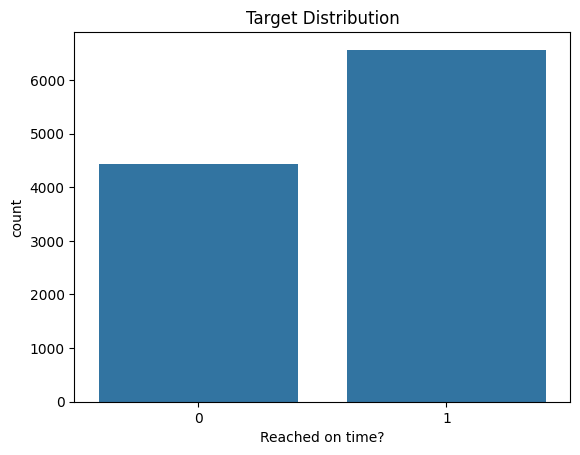

In [17]:
#Target Distribution
sns.countplot(x='Reached.on.Time_Y.N',data=data)
plt.title('Target Distribution')
plt.xlabel('Reached on time?')
plt.show()

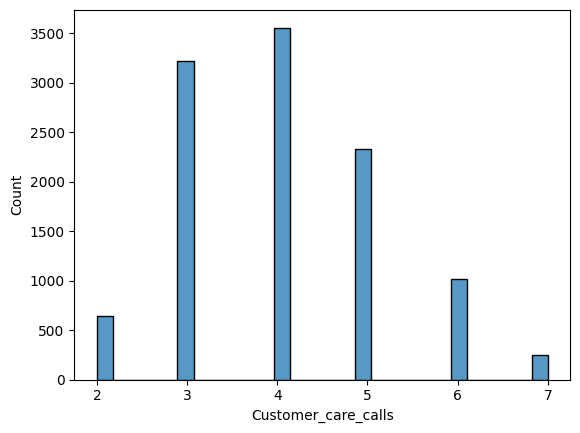

In [18]:
sns.histplot(data["Customer_care_calls"])
plt.show()

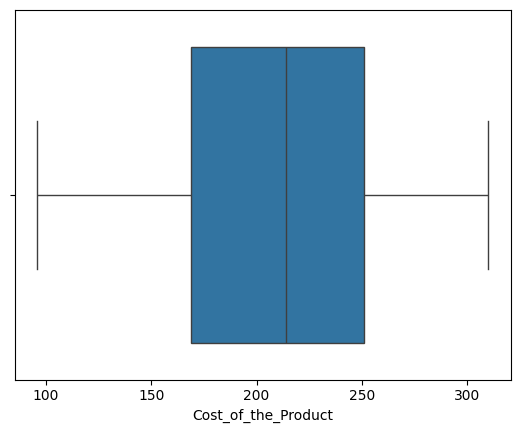

In [19]:
sns.boxplot(x=data["Cost_of_the_Product"])
plt.show()

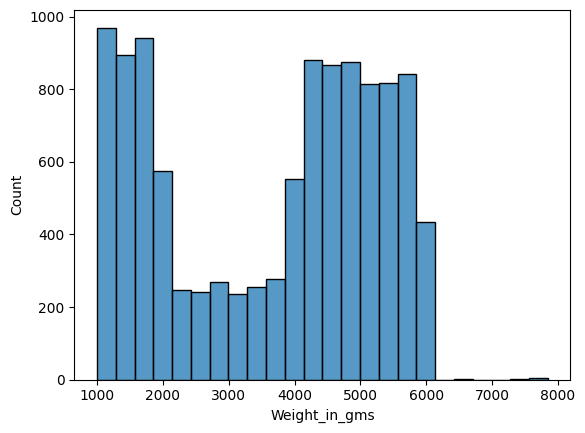

In [20]:
sns.histplot(data["Weight_in_gms"])
plt.show()

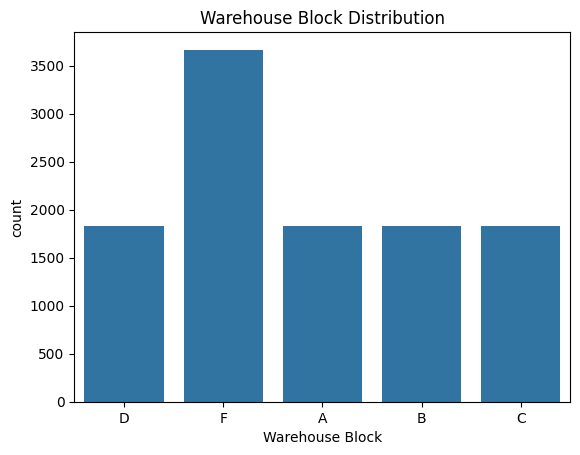

In [21]:
sns.countplot(x='Warehouse_block', data=data)
plt.title('Warehouse Block Distribution')
plt.xlabel('Warehouse Block')
plt.show()

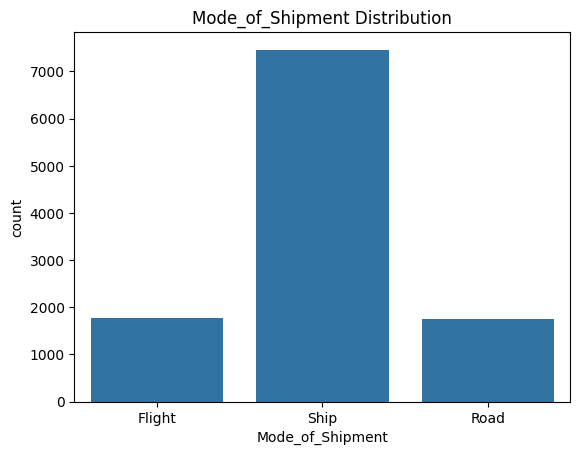

In [22]:
sns.countplot(x='Mode_of_Shipment', data=data)
plt.title('Mode_of_Shipment Distribution')
plt.xlabel('Mode_of_Shipment')
plt.show()

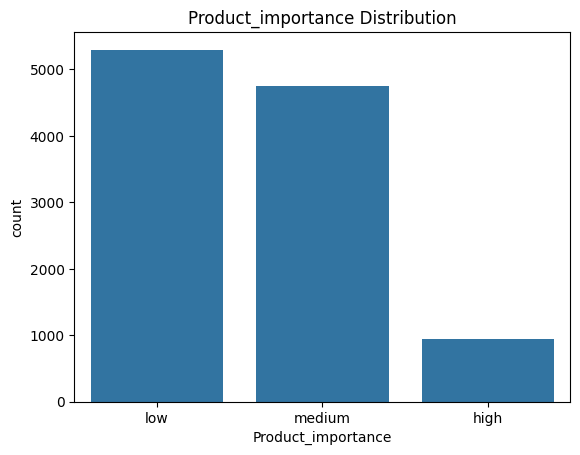

In [23]:
sns.countplot(x='Product_importance', data=data)
plt.title('Product_importance Distribution')
plt.xlabel('Product_importance')
plt.show()

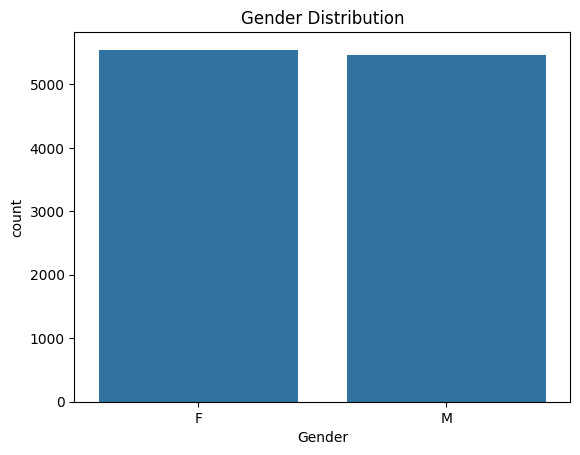

In [24]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

In [23]:
# Univariate analysis for numerical columns

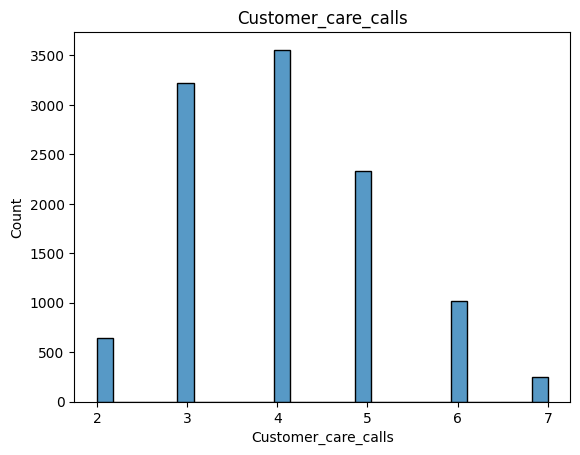

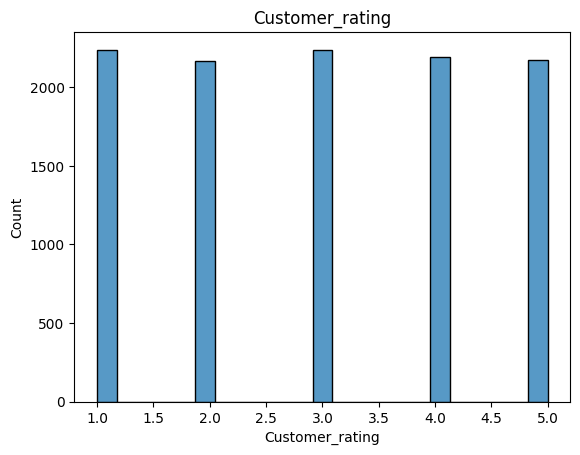

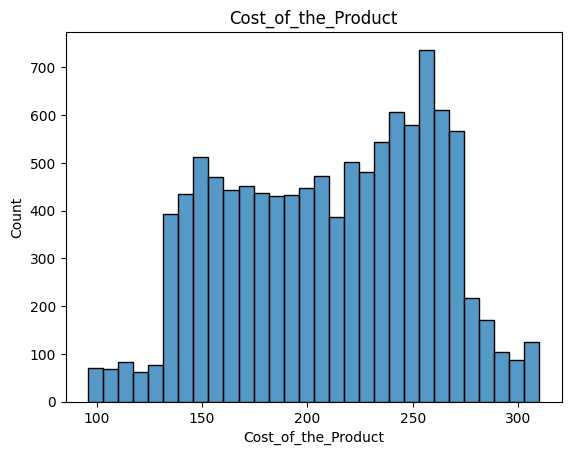

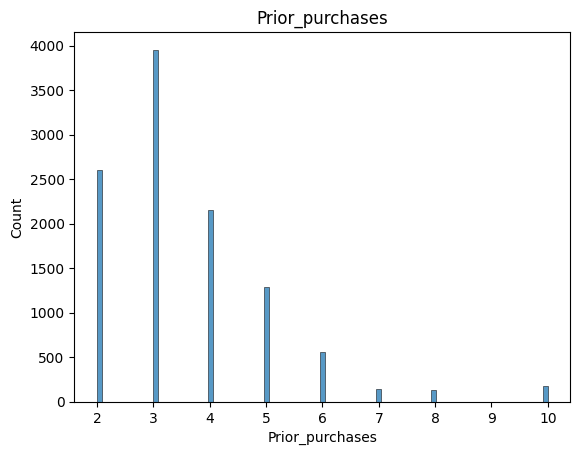

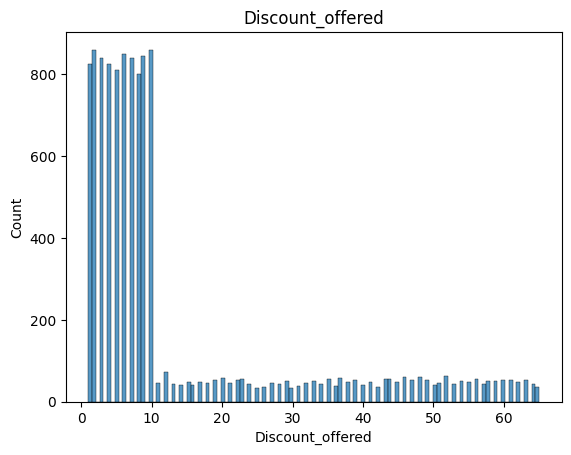

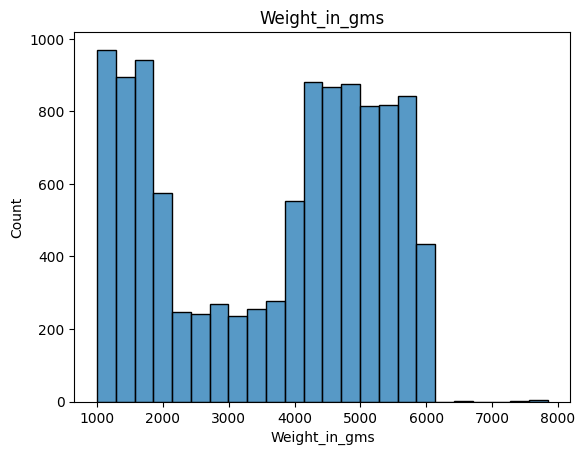

In [25]:
cols = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
for z in cols:
    sns.histplot(data[z])
    plt.title(z)
    plt.show()

In [25]:
# Bivariate Analysis: Relationship between two columns

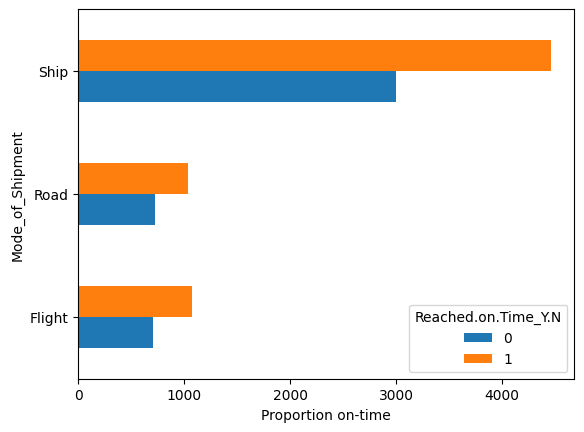

In [26]:
s = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
s.plot(kind='barh')
plt.xlabel('Proportion on-time')
plt.show()

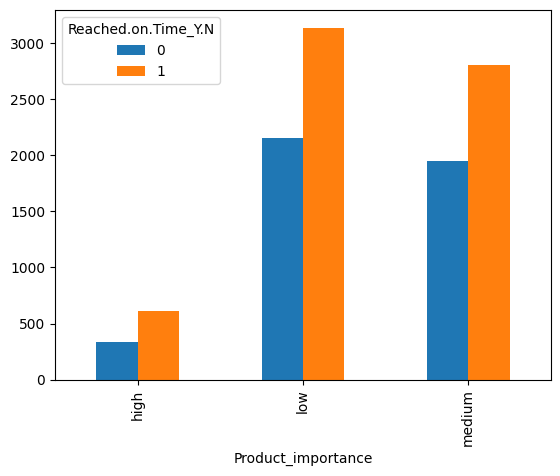

In [27]:
t = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
t.plot(kind='bar')
plt.show()

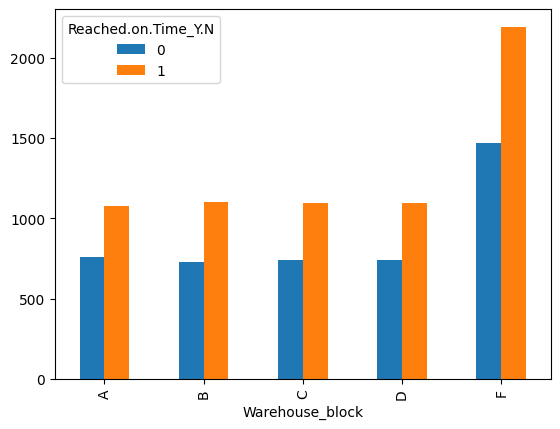

In [28]:
r = pd.crosstab(data['Warehouse_block'],data['Reached.on.Time_Y.N'])
r.plot(kind='bar')
plt.show()

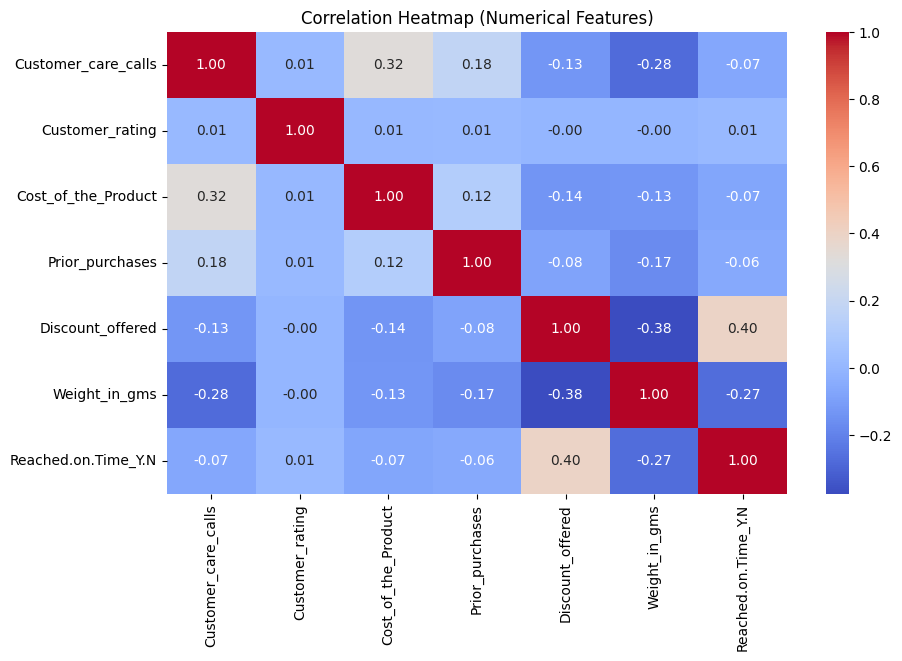

In [29]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
corr = data[cols + ['Reached.on.Time_Y.N']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

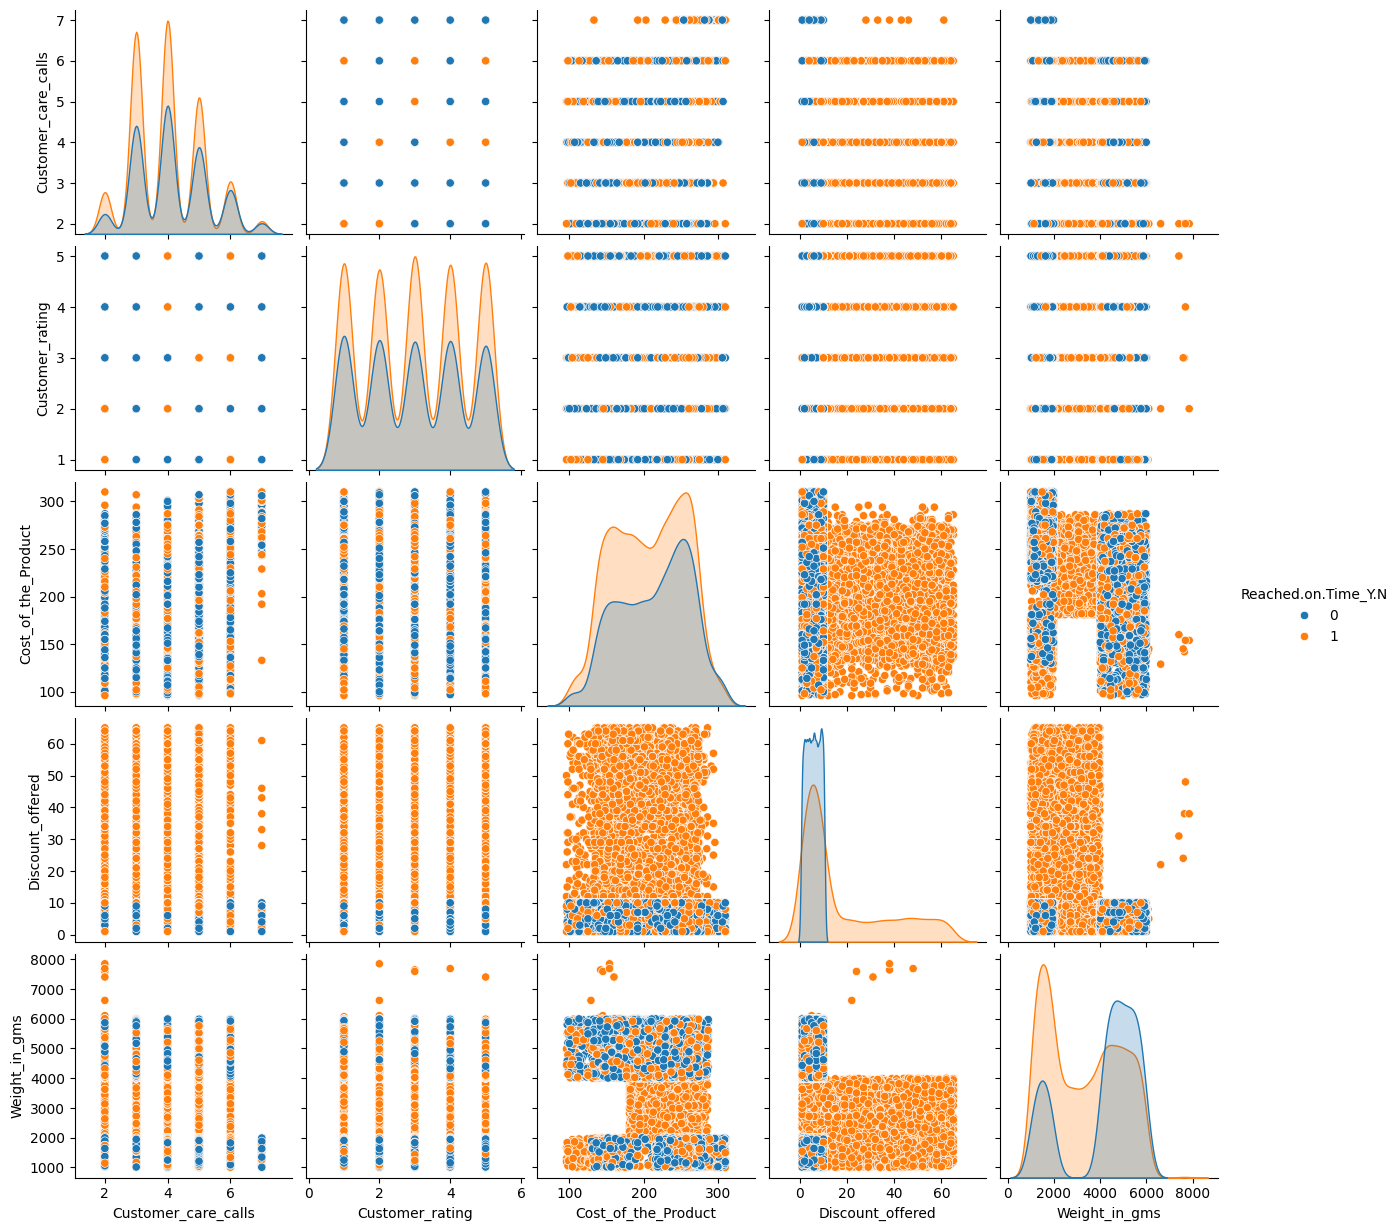

In [30]:
# Pairplot: shows scatter plots + histograms together
sns.pairplot(data[['Customer_care_calls','Customer_rating',
                    'Cost_of_the_Product','Discount_offered',
                    'Weight_in_gms','Reached.on.Time_Y.N']],
             hue='Reached.on.Time_Y.N')
plt.show()

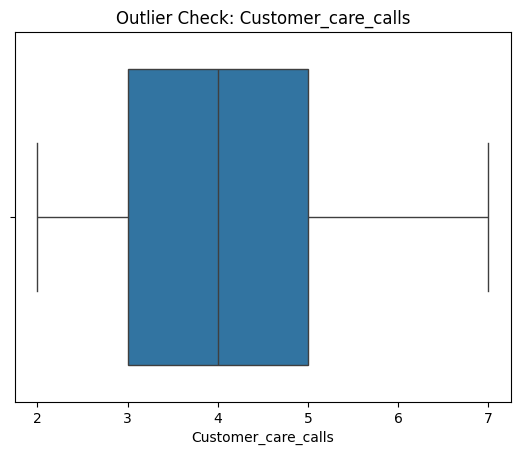

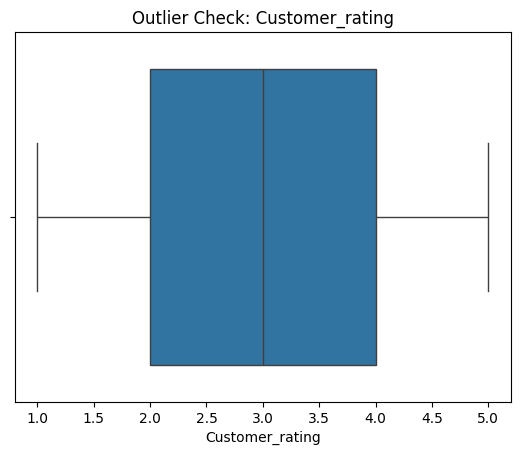

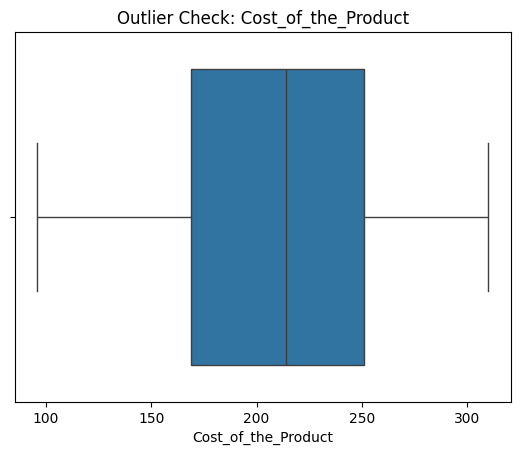

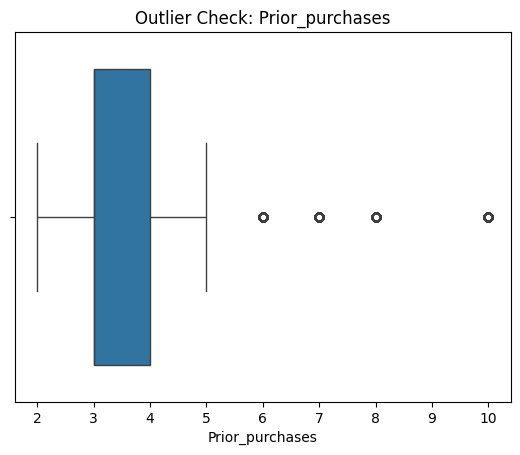

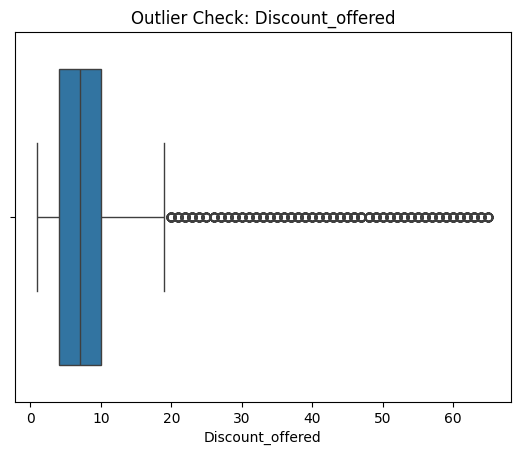

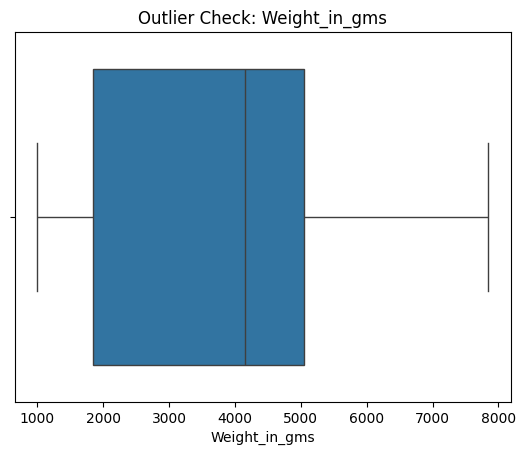

In [31]:
# Outlier detection using boxplots
for z in cols:
    sns.boxplot(x=data[z])
    plt.title(f'Outlier Check: {z}')
    plt.show()

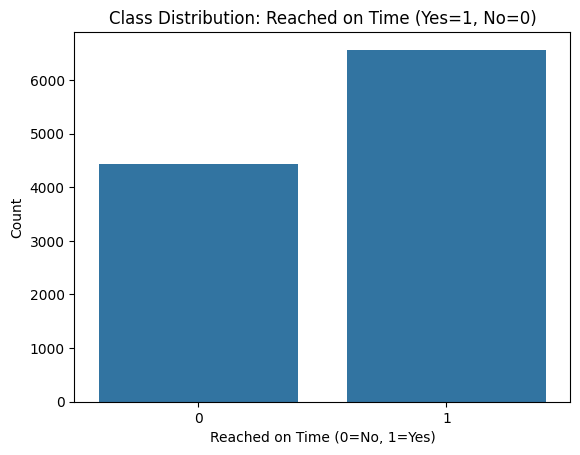

In [32]:
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title("Class Distribution: Reached on Time (Yes=1, No=0)")
plt.xlabel("Reached on Time (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

In [33]:
#Label encoding and one hot encoding

In [34]:
# Copy dataset
encode_data = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Label Encode
encode_data['Product_importance'] = le.fit_transform(encode_data['Product_importance'])
encode_data['Gender'] = le.fit_transform(encode_data['Gender'])

# One-Hot Encode nominal categorical columns
encode_data = pd.get_dummies(encode_data,
                             columns=['Warehouse_block', 'Mode_of_Shipment'],
                             drop_first=True)

# Check
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,False,False,True,False,False,False
1,2,4,5,216,2,1,1,59,3088,1,False,False,False,True,False,False
2,3,2,2,183,4,1,1,48,3374,1,False,False,False,False,False,False
3,4,3,3,176,4,2,1,10,1177,1,True,False,False,False,False,False
4,5,2,2,184,3,2,0,46,2484,1,False,True,False,False,False,False


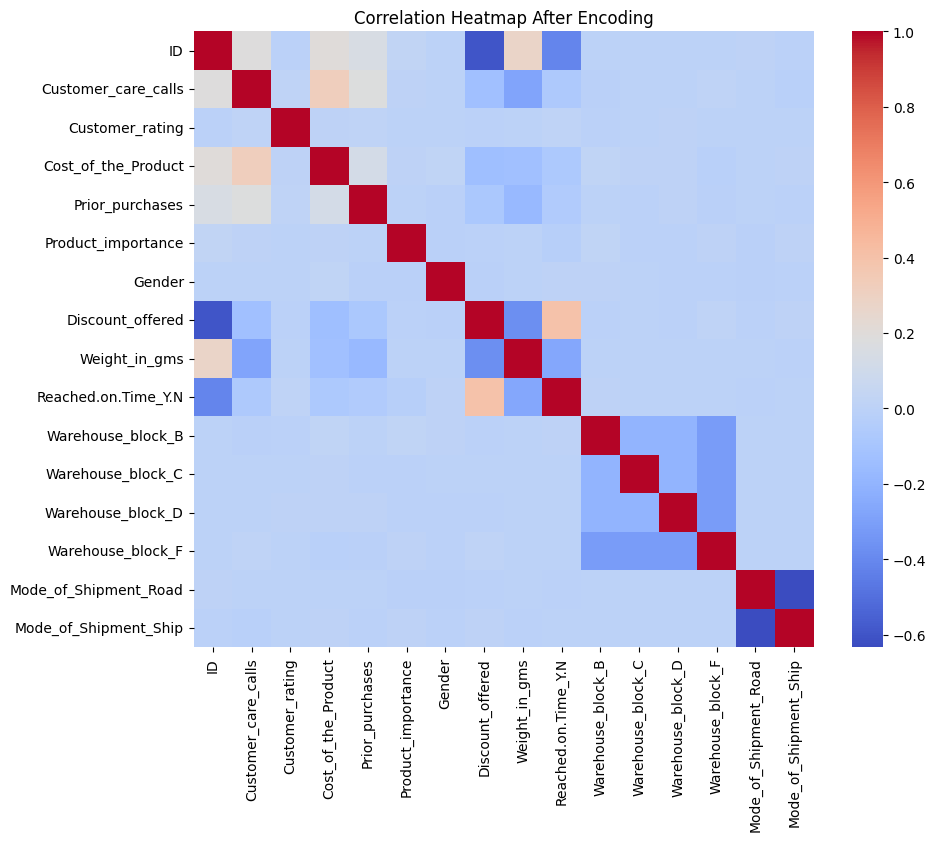

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Encoding")
plt.show()

In [36]:
# Check only the encoded columns
encode_data[['Product_importance', 'Gender'] +
            [col for col in encode_data.columns if 'Warehouse_block' in col or 'Mode_of_Shipment' in col]].head()
# Convert all boolean columns to 0/1
encode_data = encode_data.astype(int)
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0


In [37]:
# Initialize StandardScaler
std_scaler = StandardScaler()
# Columns to normalize
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Apply to numerical columns
std_scaled_data = encode_data.copy()
std_scaled_data[num_cols] = std_scaler.fit_transform(encode_data[num_cols])

# Check results
print(std_scaled_data[num_cols].describe())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         1.099900e+04     1.099900e+04         1.099900e+04   
mean          2.325624e-16    -5.975562e-17        -1.343694e-16   
std           1.000045e+00     1.000045e+00         1.000045e+00   
min          -1.799887e+00    -1.408199e+00        -2.376077e+00   
25%          -9.237994e-01    -7.007551e-01        -8.571765e-01   
50%          -4.771132e-02     6.689172e-03         7.913188e-02   
75%           8.283768e-01     7.141334e-01         8.489855e-01   
max           2.580553e+00     1.421578e+00         2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     1.099900e+04      1.099900e+04   1.099900e+04  
mean     -2.067221e-17     -4.134443e-17  -1.188652e-16  
std       1.000045e+00      1.000045e+00   1.000045e+00  
min      -1.029424e+00     -7.635530e-01  -1.610109e+00  
25%      -3.727348e-01     -5.784225e-01  -1.097360e+00  
50%      -3.727348e-01     -3.932921e-0

In [38]:
encode_data['Cost_to_Weight_ratio'] = encode_data['Cost_of_the_Product'] / encode_data['Weight_in_gms']

#Handling infinity and NaN values
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values  with the median of valid ratios
encode_data['Cost_to_Weight_ratio'].fillna(encode_data['Cost_to_Weight_ratio'].median(), inplace=True)

C:\Users\bolli\AppData\Local\Temp\ipykernel_13692\1755295904.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encode_data['Cost_to_Weight_ratio'].fillna(encode_data['Cost_to_Weight_ratio'].median(), inplace=True)


In [39]:
print("Any NaN values left?", encode_data.isnull().sum().sum())
print("\nCost_to_Weight_ratio summary:\n", encode_data['Cost_to_Weight_ratio'].describe())

# Preview final dataset
encode_data.head()

Any NaN values left? 0

Cost_to_Weight_ratio summary:
 count    10999.000000
mean         0.079229
std          0.055913
min          0.016482
25%          0.039771
50%          0.054916
75%          0.103455
max          0.309073
Name: Cost_to_Weight_ratio, dtype: float64


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0,0.074074


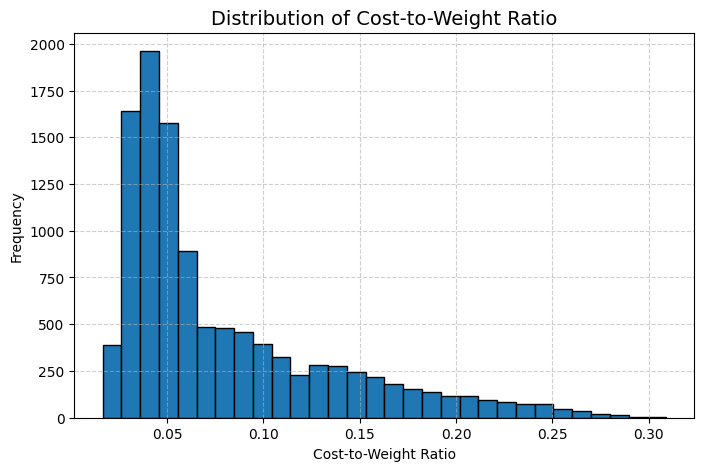

In [40]:
plt.figure(figsize=(8,5))
plt.hist(encode_data['Cost_to_Weight_ratio'], bins=30, edgecolor='black')
plt.title('Distribution of Cost-to-Weight Ratio', fontsize=14)
plt.xlabel('Cost-to-Weight Ratio')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [41]:
# Value Count

In [42]:
# For target column
print("Target Variable (Reached.on.Time_Y.N):")
print(data['Reached.on.Time_Y.N'].value_counts())
print("\nNormalized Value Counts (Proportion):")
print(data['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Normalized Value Counts (Proportion):
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [43]:
# For all categorical columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())
    print("\nNormalized:")
    print(data[col].value_counts(normalize=True))


Column: Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Normalized:
Warehouse_block
F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: proportion, dtype: float64

Column: Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Normalized:
Mode_of_Shipment
Ship      0.678425
Flight    0.161560
Road      0.160015
Name: proportion, dtype: float64

Column: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Normalized:
Product_importance
low       0.481589
medium    0.432221
high      0.086190
Name: proportion, dtype: float64

Column: Gender
Gender
F    5545
M    5454
Name: count, dtype: int64

Normalized:
Gender
F    0.504137
M    0.495863
Name: proportion, dtype: float64


In [44]:
encode_data.select_dtypes(include=['object']).columns
encode_data.dtypes

ID                         int64
Customer_care_calls        int64
Customer_rating            int64
Cost_of_the_Product        int64
Prior_purchases            int64
Product_importance         int64
Gender                     int64
Discount_offered           int64
Weight_in_gms              int64
Reached.on.Time_Y.N        int64
Warehouse_block_B          int64
Warehouse_block_C          int64
Warehouse_block_D          int64
Warehouse_block_F          int64
Mode_of_Shipment_Road      int64
Mode_of_Shipment_Ship      int64
Cost_to_Weight_ratio     float64
dtype: object

In [45]:
X = encode_data.drop('Reached.on.Time_Y.N', axis=1)
y = encode_data['Reached.on.Time_Y.N']

In [46]:
X

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,44,1233,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,59,3088,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,48,3374,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,46,2484,0,1,0,0,0,0,0.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,2,0,1,1538,0,0,0,0,0,1,0.163849
10995,10996,4,1,232,5,2,0,6,1247,1,0,0,0,0,1,0.186047
10996,10997,5,4,242,5,1,0,4,1155,0,1,0,0,0,1,0.209524
10997,10998,5,2,223,6,2,1,2,1210,0,0,0,1,0,1,0.184298


In [47]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split training data into train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [49]:
# shape of the Training, testing dataset after splitting
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8799, 16)
Testing set shape: (2200, 16)


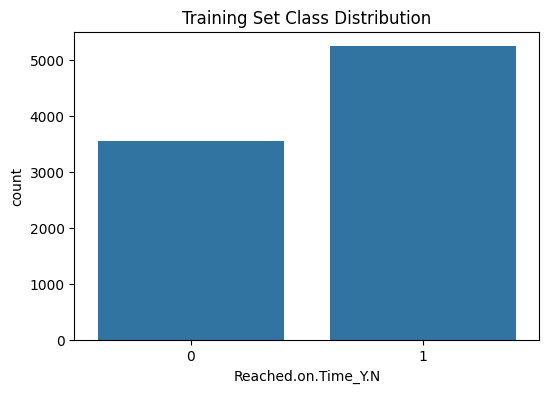

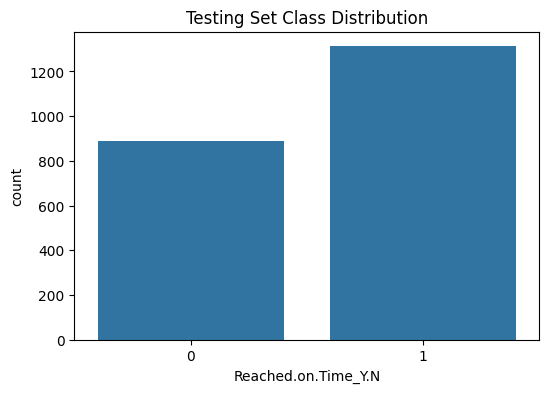

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title("Testing Set Class Distribution")
plt.show()

In [51]:
# Check original class distribution
print("Before SMOTE class distribution:", Counter(y_train))

Before SMOTE class distribution: Counter({1: 5250, 0: 3549})


In [52]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 5250, 1: 5250})


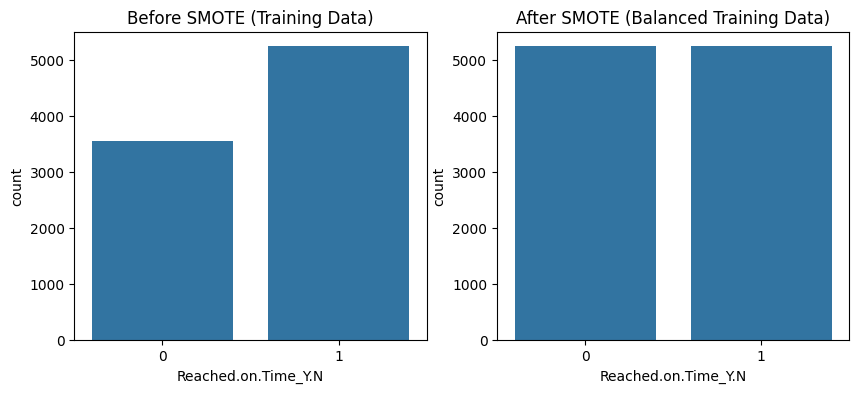

In [53]:
# Visualization before & after
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE (Training Data)")
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title("After SMOTE (Balanced Training Data)")
plt.show()

In [54]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),  # L2 regularization (smaller C = stronger)
    
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    
    "Naive Bayes": GaussianNB(),
    
    "KNN": KNeighborsClassifier(n_neighbors=9),  # more neighbors → smoother, less overfitting
    
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=42),
    
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5, use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,num_leaves=20, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

In [55]:
results = []

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    
    # Cross-validation accuracy (10-fold)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    
    results.append({
        'Model': name,
        'Mean CV Accuracy': round(np.mean(cv_scores), 4),
        'Std Dev': round(np.std(cv_scores), 4)
    })

results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n Cross-validation results (Overfitting check):")
print(results_df)


 Cross-validation results (Overfitting check):
                 Model  Mean CV Accuracy  Std Dev
3          Naive Bayes            0.6874   0.0092
2        Random Forest            0.6825   0.0091
5                  SVM            0.6819   0.0122
1        Decision Tree            0.6817   0.0096
8             CatBoost            0.6641   0.0130
7             LightGBM            0.6609   0.0163
6              XGBoost            0.6560   0.0206
4                  KNN            0.6544   0.0113
0  Logistic Regression            0.6535   0.0114


In [57]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)
# Define models with anti-overfitting hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=RND),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=4, random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, 
                                            min_samples_leaf=3, max_features='sqrt', random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=RND),
    "XGBoost": XGBClassifier(max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                             reg_lambda=1, n_estimators=200, random_state=RND, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(num_leaves=20, max_depth=6, subsample=0.8, reg_lambda=0.5,
                               learning_rate=0.05, n_estimators=200, random_state=RND),
    "CatBoost": CatBoostClassifier(depth=6, learning_rate=0.05, l2_leaf_reg=3, n_estimators=200,
                                   verbose=0, random_state=RND)
}

In [58]:
# Run cross-validation to check improvement
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:48:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:48:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:48:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } 

[LightGBM] [Info] Number of positive: 4725, number of negative: 3194
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 7919, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596666 -> initscore=0.391594
[LightGBM] [Info] Start training from score 0.391594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [59]:
# Display results
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
              Model  Mean CV Accuracy  Std Dev
                SVM          0.688373 0.010290
        Naive Bayes          0.686214 0.008730
      Decision Tree          0.681100 0.006851
      Random Forest          0.676897 0.012086
           CatBoost          0.674737 0.008961
           LightGBM          0.670987 0.013449
            XGBoost          0.670078 0.012223
Logistic Regression          0.655189 0.011523
                KNN          0.654395 0.013426


In [61]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


 Training and evaluating Logistic Regression...


C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       710
           1       0.74      0.67      0.70      1050

    accuracy                           0.66      1760
   macro avg       0.65      0.66      0.65      1760
weighted avg       0.67      0.66      0.66      1760


 Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.58      0.89      0.71       710
           1       0.89      0.57      0.69      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760


 Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       710
           1       

C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:49:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       710
           1       0.99      0.93      0.96      1050

    accuracy                           0.95      1760
   macro avg       0.95      0.96      0.95      1760
weighted avg       0.96      0.95      0.95      1760


 Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

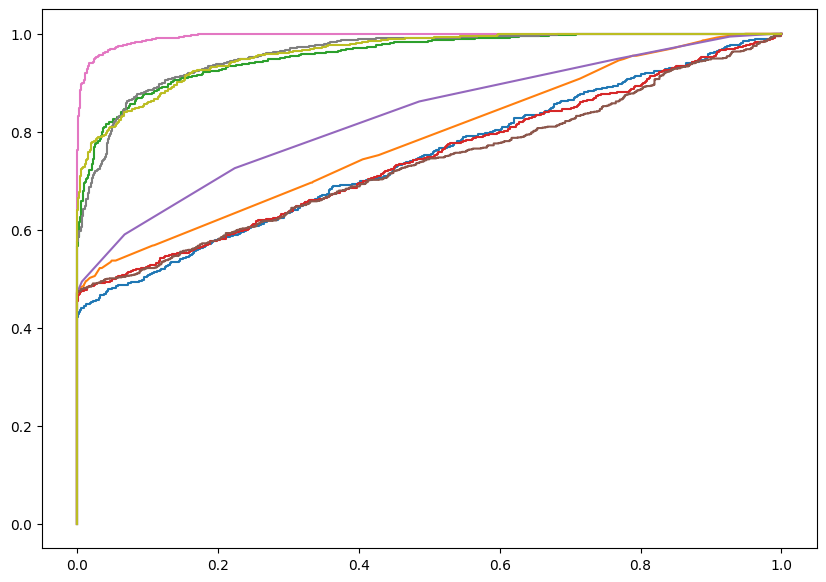

In [62]:
# --- Store results ---
results = {}
comparison = []

plt.figure(figsize=(10, 7))
for name, model in models.items():
    print(f"\n Training and evaluating {name}...")
    
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_prob)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_val_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

C:\Users\bolli\AppData\Local\Temp\ipykernel_13692\2136409572.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


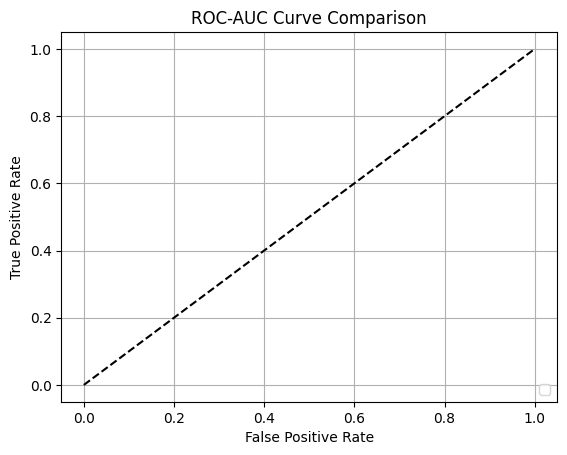

In [63]:
# --- Plot ROC Curve ---
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [64]:
# --- Final Comparison Table ---
comparison_df = pd.DataFrame(comparison).sort_values(by='ROC-AUC', ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9540     0.9889  0.9333    0.9603   0.9949
8             CatBoost    0.8591     0.9774  0.7819    0.8688   0.9609
7             LightGBM    0.8665     0.9605  0.8095    0.8786   0.9603
2        Random Forest    0.7705     0.9954  0.6181    0.7626   0.9568
4                  KNN    0.7460     0.8274  0.7257    0.7732   0.8298
1        Decision Tree    0.6989     0.8869  0.5676    0.6922   0.7837
0  Logistic Regression    0.6608     0.7357  0.6733    0.7031   0.7439
3          Naive Bayes    0.6824     0.9823  0.4762    0.6414   0.7437
5                  SVM    0.6864     0.9698  0.4895    0.6506   0.7348


In [65]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


Training and Evaluating: Logistic Regression
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       710
           1       0.74      0.67      0.70      1050

    accuracy                           0.66      1760
   macro avg       0.65      0.66      0.65      1760
weighted avg       0.67      0.66      0.66      1760



C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


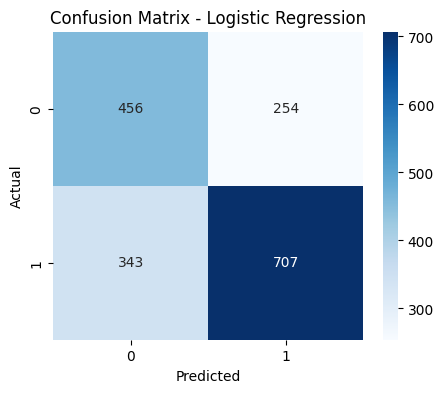

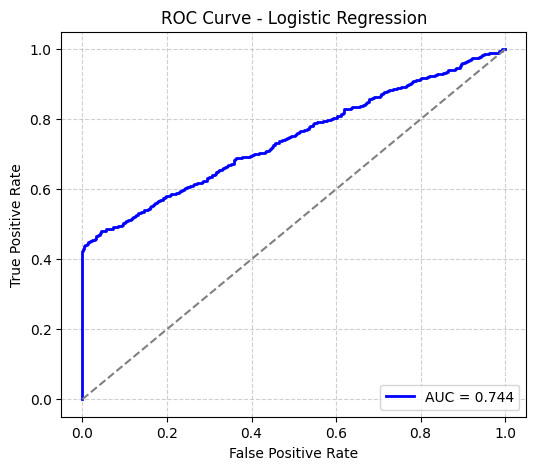


Training and Evaluating: Decision Tree
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.71       710
           1       0.89      0.57      0.69      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760



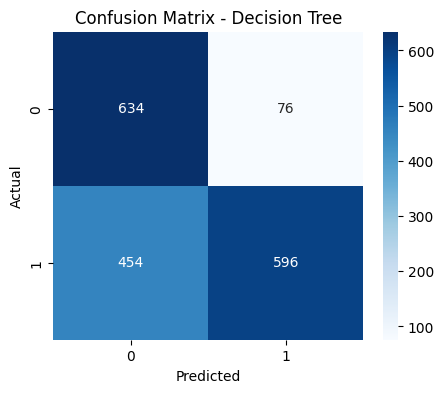

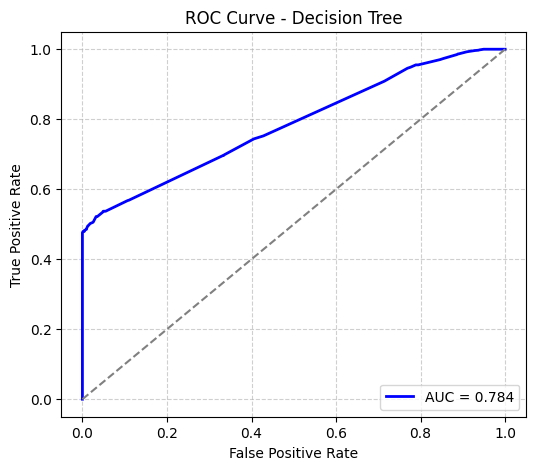


Training and Evaluating: Random Forest
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       710
           1       1.00      0.62      0.76      1050

    accuracy                           0.77      1760
   macro avg       0.82      0.81      0.77      1760
weighted avg       0.85      0.77      0.77      1760



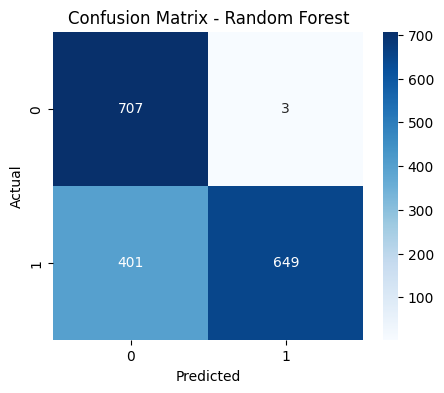

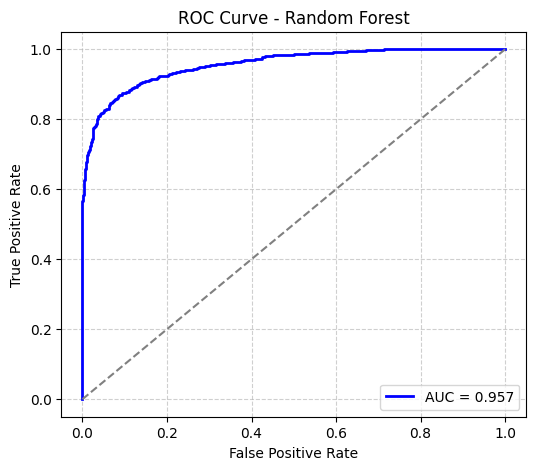


Training and Evaluating: Naive Bayes
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.71       710
           1       0.98      0.48      0.64      1050

    accuracy                           0.68      1760
   macro avg       0.77      0.73      0.68      1760
weighted avg       0.81      0.68      0.67      1760



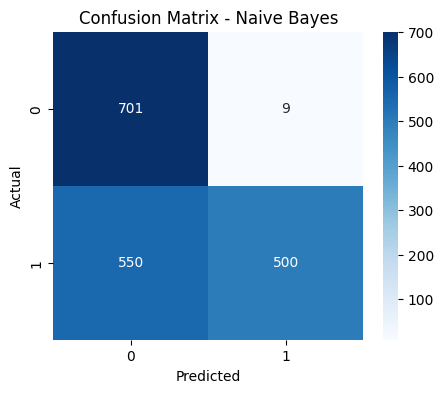

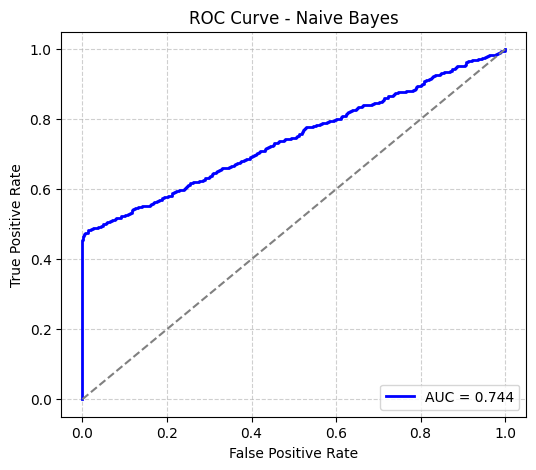


Training and Evaluating: KNN
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       710
           1       0.83      0.73      0.77      1050

    accuracy                           0.75      1760
   macro avg       0.74      0.75      0.74      1760
weighted avg       0.76      0.75      0.75      1760



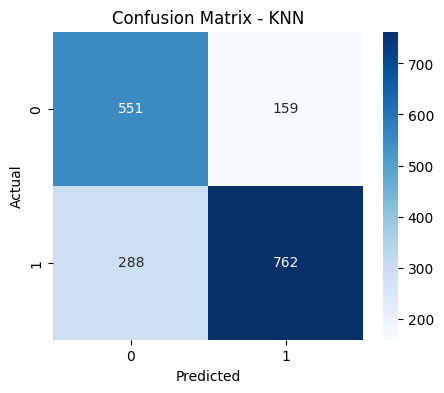

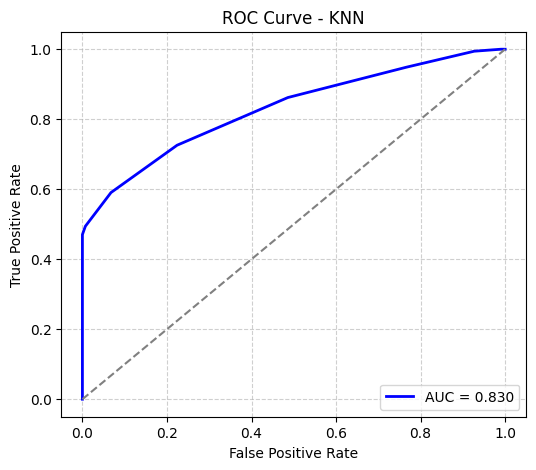


Training and Evaluating: SVM
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       710
           1       0.97      0.49      0.65      1050

    accuracy                           0.69      1760
   macro avg       0.77      0.73      0.68      1760
weighted avg       0.81      0.69      0.68      1760



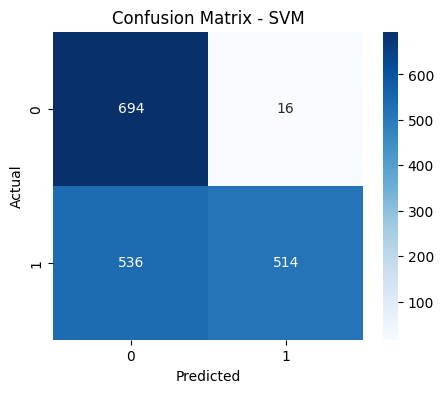

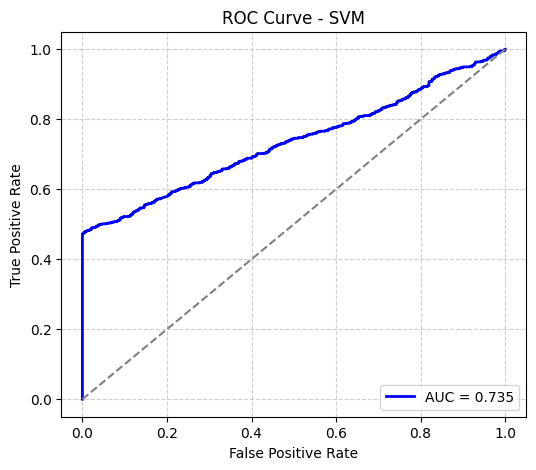


Training and Evaluating: XGBoost
----------------------------------------------------------------------


C:\Users\bolli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:50:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       710
           1       0.99      0.93      0.96      1050

    accuracy                           0.95      1760
   macro avg       0.95      0.96      0.95      1760
weighted avg       0.96      0.95      0.95      1760



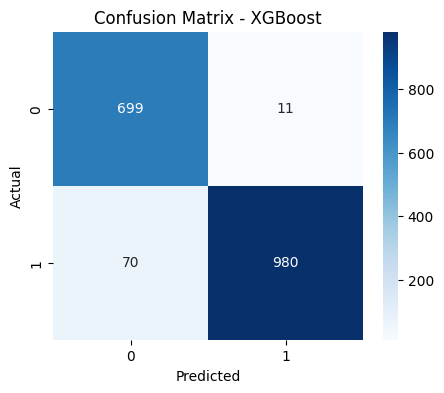

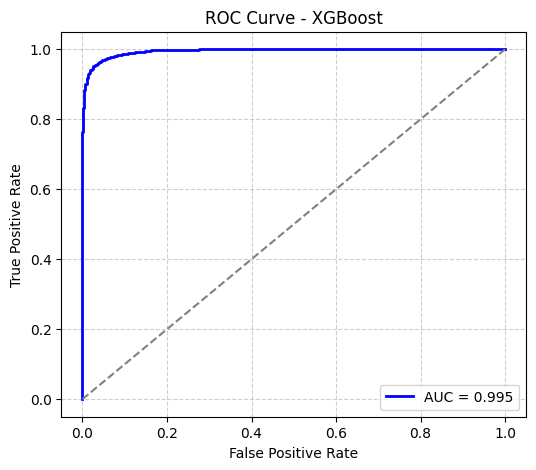


Training and Evaluating: LightGBM
----------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

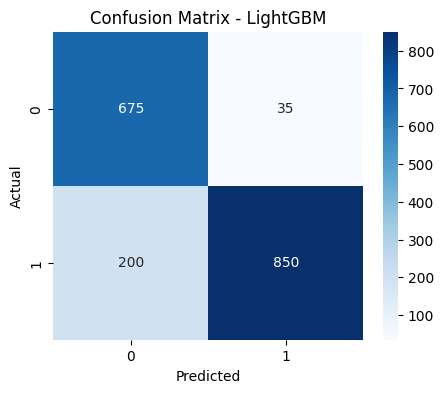

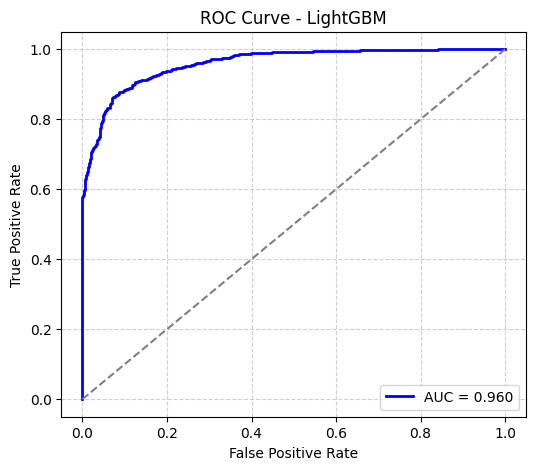


Training and Evaluating: CatBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       710
           1       0.98      0.78      0.87      1050

    accuracy                           0.86      1760
   macro avg       0.86      0.88      0.86      1760
weighted avg       0.89      0.86      0.86      1760



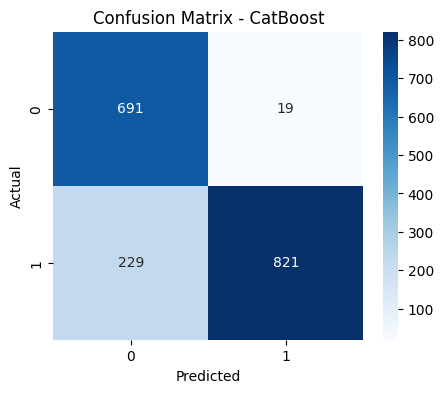

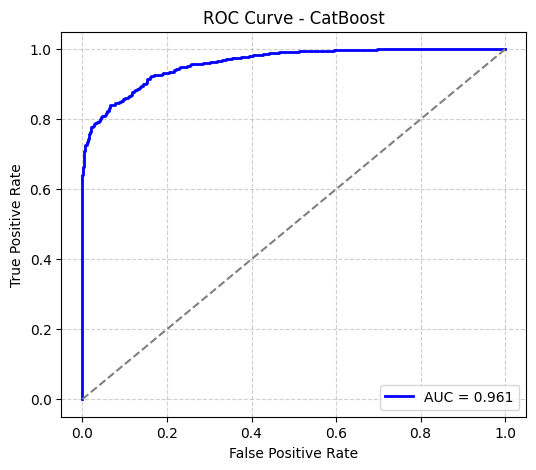

In [66]:
comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    
    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [67]:
import joblib

# Save only the XGBoost model
joblib.dump(models["XGBoost"], "model.pkl")
print("✅ XGBoost model saved successfully as model.pkl")


✅ XGBoost model saved successfully as model.pkl


In [75]:
model.get_booster().feature_names


['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Warehouse_block_B',
 'Warehouse_block_C',
 'Warehouse_block_D',
 'Warehouse_block_F',
 'Mode_of_Shipment_Road',
 'Mode_of_Shipment_Ship',
 'Cost_to_Weight_ratio']